In [2]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Shabiul\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Shabiul\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shabiul\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shabiul\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shabiul\anaconda3\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\Shabiul\anaconda3\Lib\socket.py", line 706, in readinto
    return self._sock.recv_into(b)
           ^^^


   -- ------------------------------------ 19.2/300.9 MB 123.0 kB/s eta 0:38:11
   -- ------------------------------------ 19.2/300.9 MB 123.0 kB/s eta 0:38:11
   -- ------------------------------------ 19.2/300.9 MB 123.0 kB/s eta 0:38:11
   -- ------------------------------------ 19.2/300.9 MB 123.0 kB/s eta 0:38:11
   -- ------------------------------------ 19.2/300.9 MB 123.0 kB/s eta 0:38:11
   -- ------------------------------------ 19.2/300.9 MB 123.0 kB/s eta 0:38:11
   -- ------------------------------------ 19.3/300.9 MB 117.0 kB/s eta 0:40:07
   -- ------------------------------------ 19.3/300.9 MB 117.0 kB/s eta 0:40:07
   -- ------------------------------------ 19.3/300.9 MB 117.0 kB/s eta 0:40:07
   -- ------------------------------------ 19.3/300.9 MB 117.0 kB/s eta 0:40:07
   -- ------------------------------------ 19.3/300.9 MB 117.0 kB/s eta 0:40:07
   -- ------------------------------------ 19.3/300.9 MB 117.0 kB/s eta 0:40:07
   -- ---------------------------------

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile



ModuleNotFoundError: No module named 'tensorflow'

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, Callback
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Custom callback to stop training once a certain accuracy is reached
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.96:
            print("\nReached 97% accuracy so cancelling training!")
            self.model.stop_training = True

# Function to schedule learning rate
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Create data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

TRAINING_DIR = '/content/drive/MyDrive/Indian_Thai_BankNotes_Dataset/IndianBankNotes/Training'
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=32,
    class_mode='categorical',
    target_size=(256, 256)
)

validation_datagen = ImageDataGenerator(rescale=1./255)

VALIDATION_DIR = '/content/drive/MyDrive/Indian_Thai_BankNotes_Dataset/IndianBankNotes/Validation'
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=32,
    class_mode='categorical',
    target_size=(256, 256)
)

# Use EfficientNetB0 with additional Dense layers and dropout for regularization
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

model = tf.keras.models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Set a learning rate scheduler
lr_schedule = LearningRateScheduler(scheduler, verbose=1)

# Use the Adam optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the new architecture and advanced techniques
callbacks = [myCallback(), lr_schedule]
history = model.fit(
    train_generator,
    epochs=20,
    verbose=1,
    validation_data=validation_generator,
    callbacks=callbacks
)


Found 1600 images belonging to 10 classes.
Found 400 images belonging to 10 classes.

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/20
50/50 [==============================] - 87s 1s/step - loss: 1.1098 - accuracy: 0.6331 - val_loss: 4.0124 - val_accuracy: 0.1000 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/20
50/50 [==============================] - 53s 1s/step - loss: 0.2766 - accuracy: 0.9112 - val_loss: 2.5210 - val_accuracy: 0.0975 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/20
50/50 [==============================] - 62s 1s/step - loss: 0.2137 - accuracy: 0.9381 - val_loss: 2.7355 - val_accuracy: 0.1000 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/20
50/50 [==============================] - 52s 1s/step - loss: 0.2064 - accuracy: 0.9513 - val_loss: 2.6180 - val_accuracy: 0.1

NameError: ignored

total training images of 10 New:  250
total training images of 10 Old:  190
total training images of 100 New: 190
total training images of 100 Old: 190
total training images of 20:      190
total training images of 200:     190
total training images of 2000:    189
total training images of 50 New:  190
total training images of 50 Old:  190
total training images of 500:     190


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 8, 8, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 512)               655872    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)              

Plotting loss and accuracy.

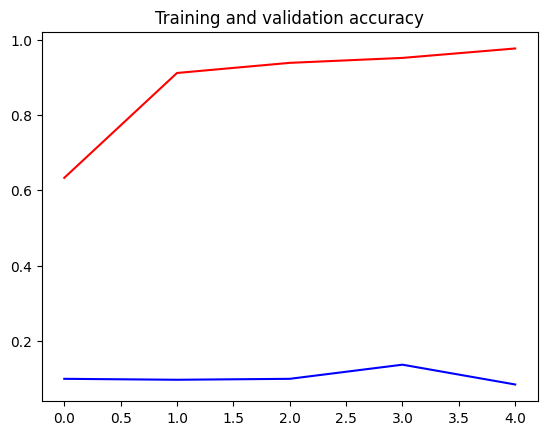

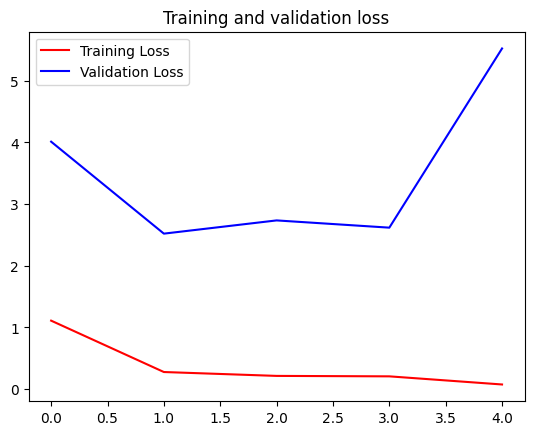

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Predicting with new images.

In [7]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])

  #predictions = model.predict(images,batch_size=32)
  #class_names = ['10RsNote', '10RsNote', '100RsNote', '100RsNote','20RsNote','200RsNote', '2000RsNote','50RsNote','50RsNote','500RsNote']
  #print(model.predict_classes())
  print(np.argmax(model.predict(images), axis=-1))

Saving INDIA100NEW_163.jpg to INDIA100NEW_163.jpg
1/1 [==============================] - 2s 2s/step
[7]


Export the model


In [ ]:
INDIAN_CURRENCY_SAVED_MODEL = "exp_saved_model"
tf.saved_model.save(model, INDIAN_CURRENCY_SAVED_MODEL)
loaded = tf.saved_model.load(INDIAN_CURRENCY_SAVED_MODEL)
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

Convert using TFLite's converter

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(INDIAN_CURRENCY_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

CREATING LABEL.TXT

In [ ]:
labels = ['10 Rupees', 'Rupees 10','100 Rupees','Rupees 100','20 Rupees','200 Rupees','2000 Rupees','50 Rupees','Rupees 50','500 Rupees']

with open('labels.txt', 'w') as f:
    f.write('\n'.join(labels))

Downloading files

In [ ]:

try:
    from google.colab import files
    files.download('converted_model.tflite')
    files.download('labels.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>